In [146]:
%pylab inline
%precision 6

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


'%.6f'

In [147]:
import pandas as pd
import sklearn as skl

In [148]:
from common.iteration import piter
from common.serialization import pickle_save, pickle_load
from common.classes.Struct import Struct
from common.feature_selection import forward_search,backward_search,forward_backward_search
from common.feature_transformations import get_category_ids_encoding, get_one_hot_encoding
from common.splits import get_train_test_sels,shuffle
from common.modelling import fit_method_cv_train_test, evaluate_feature_collections

In [149]:
pd.options.display.max_colwidth=100
np.set_printoptions(linewidth=140,edgeitems=10)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
rcParams['figure.figsize'] = (8.0, 5.0)

In [150]:
#https://nlpub.ru

In [151]:
import nltk

In [152]:
#nltk.download()

In [153]:
from nltk.book import *

In [154]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [155]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [156]:
text1.concordance("extremely")

Displaying 3 of 3 matches:
t he being in other things such an extremely sensible and sagacious savage , it
 eight months think they have done extremely well , and thank God , if at last 
a very tidy , and , I may say , an extremely gentlemanlike sort of business tho


In [157]:
text1.similar("go")

be say see have do me it and as now on take him when them in come were
drink what


In [158]:
text1.common_contexts(["go","see"])

can_the and_to to_as to_to we_the you_the must_to to_for to_a you_and


In [159]:
text2.common_contexts(["very","extremely"])

,_well am_glad him_well


In [163]:
text4

<Text: Inaugural Address Corpus>

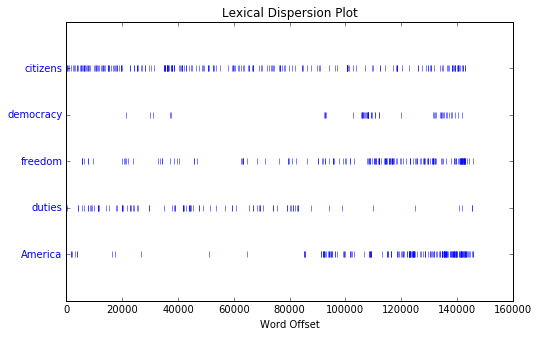

In [164]:
text4.dispersion_plot(["citizens", "democracy", 
                       "freedom", "duties", "America"])

In [165]:
text3

<Text: The Book of Genesis>

In [166]:
len(text3) # number of tokens (including punctuation)

44764

In [168]:
sorted(set(text3))[-30:]

['wouldest',
 'wounding',
 'wrapped',
 'wrath',
 'wrestled',
 'wrestlings',
 'wrong',
 'wroth',
 'wrought',
 'y',
 'ye',
 'yea',
 'year',
 'yearn',
 'years',
 'yesternight',
 'yet',
 'yield',
 'yielded',
 'yielding',
 'yoke',
 'yonder',
 'you',
 'young',
 'younge',
 'younger',
 'youngest',
 'your',
 'yourselves',
 'youth']

In [169]:
len(set(text3))

2789

In [170]:
w=sorted(set(text3))

In [171]:
w[990:1020]

['closed',
 'clothed',
 'clothes',
 'cloud',
 'clusters',
 'co',
 'coat',
 'coats',
 'coffin',
 'cold',
 'colours',
 'colt',
 'colts',
 'come',
 'comest',
 'cometh',
 'comfort',
 'comforted',
 'comi',
 'coming',
 'command',
 'commanded',
 'commanding',
 'commandment',
 'commandments',
 'commended',
 'committed',
 'commune',
 'communed',
 'communing']

In [172]:
len(text3) / len(set(text3)) # number of times each word type was used in the text

16.050197

In [173]:
text3.count("Abraham") # how many times a specific word appeared

129

In [174]:
100 * text4.count('a') / len(text4)

1.464302

In [175]:
100 * text4.count('the') / len(text4)

6.368408

In [176]:
sent1

['Call', 'me', 'Ishmael', '.']

In [177]:
sent2

['The',
 'family',
 'of',
 'Dashwood',
 'had',
 'long',
 'been',
 'settled',
 'in',
 'Sussex',
 '.']

In [178]:
text4.index('awaken')

173

In [179]:
text4[173]

'awaken'

In [180]:
fdist1 = FreqDist(text1)

In [181]:
fdist1

Counter({'annihilating': 1,
         'unprovided': 3,
         'adventurous': 4,
         'coolly': 7,
         'Ahoy': 2,
         'jet': 32,
         'Plenty': 1,
         'discoverers': 1,
         'strokes': 2,
         'lapsed': 1,
         'Baltic': 3,
         '97': 1,
         'hoofs': 3,
         'coarse': 1,
         'bleeding': 3,
         'concluded': 19,
         'revery': 1,
         'Bottom': 1,
         'Impiety': 1,
         'gains': 1,
         'magnanimous': 3,
         'rogues': 1,
         'juggling': 3,
         'forbidding': 3,
         'Elsewhere': 2,
         'study': 7,
         'nick': 1,
         'emptying': 1,
         'skirts': 4,
         'daunted': 1,
         'Merchant': 4,
         'seamless': 1,
         'spear': 10,
         'intimacy': 1,
         'perfectly': 6,
         'literature': 1,
         'capsizings': 1,
         'Warden': 4,
         'THEOLOGY': 1,
         'nineteenth': 2,
         'spiritual': 11,
         'Humiliation': 1,
         'in

In [182]:
fdist1.most_common(50)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624)]

In [183]:
common_words = [word for word,_ in fdist1.most_common(50)]

In [184]:
len(text1)

260819

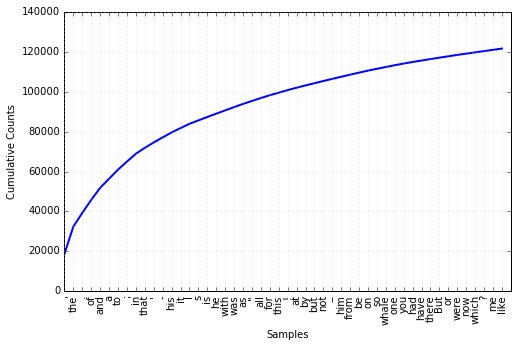

In [185]:
fdist1.plot(50, cumulative=True)

In [186]:
V = set(text1)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['CIRCUMNAVIGATION',
 'Physiognomically',
 'apprehensiveness',
 'cannibalistically',
 'characteristically',
 'circumnavigating',
 'circumnavigation',
 'circumnavigations',
 'comprehensiveness',
 'hermaphroditical',
 'indiscriminately',
 'indispensableness',
 'irresistibleness',
 'physiognomically',
 'preternaturalness',
 'responsibilities',
 'simultaneousness',
 'subterraneousness',
 'supernaturalness',
 'superstitiousness',
 'uncomfortableness',
 'uncompromisedness',
 'undiscriminating',
 'uninterpenetratingly']

In [188]:
text5

<Text: Chat Corpus>

In [187]:
fdist5 = FreqDist(text5) # analyze chat rooms
sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7) # long and frequent words from chats

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

In [189]:
list(nltk.bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

In [190]:
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


In [191]:
fdist = FreqDist(len(w) for w in text1) # distribution of word-lengths

In [192]:
fdist

Counter({1: 47933,
         2: 38513,
         3: 50223,
         4: 42345,
         5: 26597,
         6: 17111,
         7: 14399,
         8: 9966,
         9: 6428,
         10: 3528,
         11: 1873,
         12: 1053,
         13: 567,
         14: 177,
         15: 70,
         16: 22,
         17: 12,
         18: 1,
         20: 1})

In [193]:
fdist.most_common()

[(3, 50223),
 (1, 47933),
 (4, 42345),
 (2, 38513),
 (5, 26597),
 (6, 17111),
 (7, 14399),
 (8, 9966),
 (9, 6428),
 (10, 3528),
 (11, 1873),
 (12, 1053),
 (13, 567),
 (14, 177),
 (15, 70),
 (16, 22),
 (17, 12),
 (18, 1),
 (20, 1)]

In [194]:
'aska' in 'Madagaskar'

True

In [196]:
len(set(text1)) # all distinct words and punctuation tokens

19317

In [ ]:
len(set(word.lower() for word in text1))  # all lowercased tokens

In [195]:
len(set(word.lower() for word in text1 if word.isalpha()))  # all lowercased tokens without punctuation 
                                                           # only alphabetic words counted

16948

In [198]:
from nltk.chat.util import Chat
from nltk.chat.eliza import eliza_chat
from nltk.chat.iesha import iesha_chat
from nltk.chat.rude import rude_chat
from nltk.chat.suntsu import suntsu_chat
from nltk.chat.zen import zen_chat

In [199]:
eliza_chat()

Therapist
---------
Talk to the program by typing in plain English, using normal upper-
and lower-case letters and punctuation.  Enter "quit" when done.
Hello.  How are you feeling today?
>fine thanks
Please tell me more.
>I had a busy weekend
How do you feel when you say that?
>and how do you think?
Perhaps the answer lies within yourself?
>q
I see.  And what does that tell you?
>quit
Good-bye.


In [ ]:
iesha_chat()

In [200]:
rude_chat()

Talk to the program by typing in plain English, using normal upper-
and lower-case letters and punctuation.  Enter "quit" when done.
I suppose I should say hello.
>hello
Oh good, somebody else to talk to. Joy.
>why are you so rude?
That's so obvious I thought even you'd have already figured it out.
>quit
Either become more thrilling or get lost, buddy.


In [ ]:
suntsu_chat()

In [ ]:
zen_chat()

In [201]:
txt = nltk.text.Text(['I','want','to','go ','home','.','I','want','to','go','abroad','.'])

In [202]:
len(txt)

12

In [203]:
set(txt)

{'.', 'I', 'abroad', 'go', 'go ', 'home', 'to', 'want'}

In [204]:
txt.concordance("I")

Displaying 2 of 2 matches:
                                       I want to go  home . I want to go abroad
                  I want to go  home . I want to go abroad .


In [ ]:
#wiki: collocations, the Turing Test, the type-token distinction

In [205]:
from nltk.corpus import gutenberg

In [206]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [207]:
emma = nltk.Text(gutenberg.words('austen-emma.txt'))

In [208]:
nltk.corpus.gutenberg.words('austen-emma.txt')

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [209]:
emma.concordance("surprize")

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

In [210]:
print('Chars per word, Words per sentense, Num of word usages, Filename')
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w 
                        in gutenberg.words(fileid)))
    print(round(num_chars/num_words), 
          round(num_words/num_sents), 
          round(num_words/num_vocab), fileid)

Chars per word, Words per sentense, Num of word usages, Filename
5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


In [ ]:
from nltk.corpus import webtext

for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:70], '...')


In [ ]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[4]

In [ ]:
# Brown corpus, Reuters corpus
# frequencies of modal words in Brown corpus

In [ ]:
[w for w in nltk.corpus.udhr.fileids() if 'Russian' in w]

In [211]:
nltk.corpus.udhr.fileids()

['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1',
 'Aymara-Latin1',
 'Balinese-Latin1',
 'Bambara-UTF8',
 'Baoule-UTF8',
 'Basque_Euskara-Latin1',
 'Batonu_Bariba-UTF8',
 'Belorus_Belaruski-Cyrillic',
 'Belorus_Belaruski-UTF8',
 'Bemba-Latin1',
 'Bengali-UTF8',
 'Beti-UTF8',
 'Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Bora-Latin1',
 'Bosnian_Bosanski-Cyrillic',
 'Bosnian_Bosanski-Latin2',
 'Bosnian_Bosanski-UTF8',
 'Breton-Latin1',
 'Bugisnese-Latin1',
 'Bulgarian_Balgarski-Cyrillic',
 'Bulgarian_Balgarski-UTF8',
 'Cakchiquel-Latin1',
 'Campa_Pajonalino-Latin1',
 'Candoshi-Shapra-Latin1',
 'Caquinte-Latin

In [212]:
languages = ['Russian-UTF8','Serbian_Srpski-UTF8','English-Latin1',#'French_Francais-Latin1',
             'Greek_Ellinika-UTF8','Vietnamese-UTF8','Turkish_Turkce-UTF8','Nepali-UTF8']
#              'Czech-UTF8','Italian-Latin1']
#              'Norwegian-Latin1','Swedish_Svenska-Latin1',
#              'Portuguese_Portugues-Latin1',
             

In [213]:
languages = ['Russian-UTF8','German_Deutsch-Latin1','Czech-UTF8',
             'Norwegian-Latin1','Swedish_Svenska-Latin1',
              'Portuguese_Portugues-Latin1']

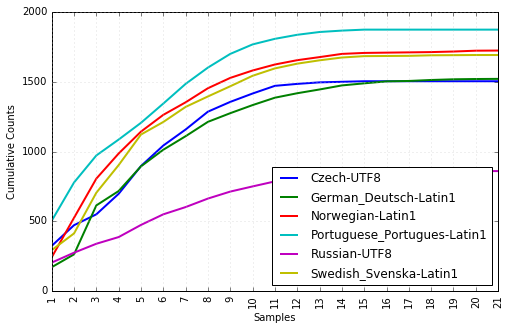

In [214]:
cfd = nltk.ConditionalFreqDist(
           (lang, len(word))
           for lang in languages
           for word in nltk.corpus.udhr.words(lang))
cfd.plot(cumulative=True)

In [215]:
rus = nltk.Text(nltk.corpus.udhr.words('Russian-UTF8'))

In [216]:
[w for w in rus if len(w)>14]

['провозглашенными',
 'несамоуправляющейся',
 'неприкосновенность',
 'правосубъектности',
 'подстрекательства',
 'предоставленных',
 'беспристрастным',
 'разбирательства',
 'посягательствам',
 'неприкосновенность',
 'корреспонденции',
 'местожительство']

In [217]:
rus.concordance('человек')

Displaying 12 of 12 matches:
на в целях обеспечения того , чтобы человек не был вынужден прибегать , в качес
 и государства с тем , чтобы каждый человек и каждый орган общества , постоянно
а в духе братства . Статья 2 Каждый человек должен обладать всеми правами и все
а страны или территории , к которой человек принадлежит , независимо от того , 
воем суверенитете . Статья 3 Каждый человек имеет право на жизнь , на свободу и
щению и наказанию . Статья 6 Каждый человек , где бы он ни находился , имеет пр
кой дискриминации . Статья 8 Каждый человек имеет право на эффективное восстано
нию или изгнанию . Статья 10 Каждый человек , для определения его прав и обязан
истрастным судом . Статья 11 Каждый человек , обвиняемый в совершении преступле
и на его честь и репутацию . Каждый человек имеет право на защиту закона от так
их посягательств . Статья 13 Каждый человек имеет право свободно передвигаться 
еделах каждого государства . Каждый человек имеет право покидать любую страну ,


In [218]:
rus.similar('дискриминации')

In [219]:
rus.common_contexts(['честь'])

его_и


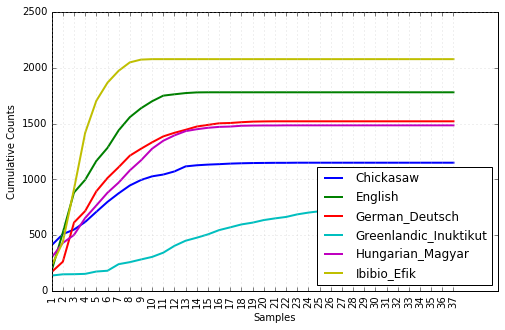

In [220]:
from nltk.corpus import udhr
>>> languages = ['Chickasaw', 'English', 'German_Deutsch',
...     'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
>>> cfd = nltk.ConditionalFreqDist(
...           (lang, len(word))
...           for lang in languages
...           for word in udhr.words(lang + '-Latin1'))
>>> cfd.plot(cumulative=True)

In [ ]:
keys

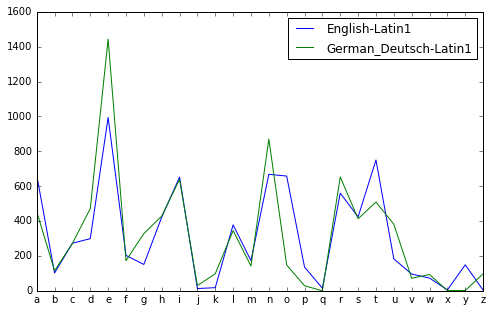

In [222]:
#for lang in []: # ,
for lang in ['English-Latin1','German_Deutsch-Latin1']:
    raw_text = nltk.corpus.udhr.raw(lang).lower()
    d = nltk.FreqDist(raw_text)
    keys = sorted(sorted(d.keys()))
    keys='abcdefghijklmnopqrstuvwxyz'
    plot([d[k] for k in keys],label=lang)
    gca().set_xticks(range(len(keys)))
    gca().set_xticklabels(keys)
legend()

In [223]:
nltk.corpus.udhr.raw(lang).lower()

'die allgemeine erklärung der menschenrechte\nresolution 217 a (iii) vom 10.12.1948 \n\npräambel\nda die anerkennung der angeborenen würde und der gleichen und unveräußerlichen rechte aller mitglieder der gemeinschaft der menschen die grundlage von freiheit, gerechtigkeit und frieden in der welt bildet, \n\nda die nichtanerkennung und verachtung der menschenrechte zu akten der barbarei geführt haben, die das gewissen der menschheit mit empörung erfüllen, und da verkündet worden ist, daß einer welt, in der die menschen rede- und glaubensfreiheit und freiheit von furcht und not genießen, das höchste streben des menschen gilt, \n\nda es notwendig ist, die menschenrechte durch die herrschaft des rechtes zu schützen, damit der mensch nicht gezwungen wird, als letztes mittel zum aufstand gegen tyrannei und unterdrückung zu greifen, \n\nda es notwendig ist, die entwicklung freundschaftlicher beziehungen zwischen den nationen zu fördern, \n\nda die völker der vereinten nationen in der charta i

In [ ]:
d

In [224]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [225]:
from nltk.corpus import inaugural
cfd = nltk.ConditionalFreqDist(
                (target, fileid[:4])
                for fileid in inaugural.fileids()
                for w in inaugural.words(fileid)
                for target in ['america', 'citizen']
                if w.lower().startswith(target))

In [226]:
# pymorphy
# Russian dictionaries, WordNet and other resources
# FreqDist, ConditionalFreqDist classes

In [227]:
L= [target for w in ['I','america', '2citizen2','you']
    for target in ['america', 'citizen']
    if w.lower().startswith(target)]

In [228]:
L

['america']

In [229]:
corpus = nltk.corpus.brown

In [230]:
corpus.fileids()

['ca01',
 'ca02',
 'ca03',
 'ca04',
 'ca05',
 'ca06',
 'ca07',
 'ca08',
 'ca09',
 'ca10',
 'ca11',
 'ca12',
 'ca13',
 'ca14',
 'ca15',
 'ca16',
 'ca17',
 'ca18',
 'ca19',
 'ca20',
 'ca21',
 'ca22',
 'ca23',
 'ca24',
 'ca25',
 'ca26',
 'ca27',
 'ca28',
 'ca29',
 'ca30',
 'ca31',
 'ca32',
 'ca33',
 'ca34',
 'ca35',
 'ca36',
 'ca37',
 'ca38',
 'ca39',
 'ca40',
 'ca41',
 'ca42',
 'ca43',
 'ca44',
 'cb01',
 'cb02',
 'cb03',
 'cb04',
 'cb05',
 'cb06',
 'cb07',
 'cb08',
 'cb09',
 'cb10',
 'cb11',
 'cb12',
 'cb13',
 'cb14',
 'cb15',
 'cb16',
 'cb17',
 'cb18',
 'cb19',
 'cb20',
 'cb21',
 'cb22',
 'cb23',
 'cb24',
 'cb25',
 'cb26',
 'cb27',
 'cc01',
 'cc02',
 'cc03',
 'cc04',
 'cc05',
 'cc06',
 'cc07',
 'cc08',
 'cc09',
 'cc10',
 'cc11',
 'cc12',
 'cc13',
 'cc14',
 'cc15',
 'cc16',
 'cc17',
 'cd01',
 'cd02',
 'cd03',
 'cd04',
 'cd05',
 'cd06',
 'cd07',
 'cd08',
 'cd09',
 'cd10',
 'cd11',
 'cd12',
 'cd13',
 'cd14',
 'cd15',
 'cd16',
 'cd17',
 'ce01',
 'ce02',
 'ce03',
 'ce04',
 'ce05',
 'ce06',
 

In [231]:
corpus.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [232]:
len(corpus.words(categories='romance'))

70022

In [233]:
corpus.raw(categories='romance')

"\n\n\tThey/ppss neither/cc liked/vbd nor/cc disliked/vbd the/at Old/jj-tl Man/nn-tl ./.\nTo/in them/ppo he/pps could/md have/hv been/ben the/at broken/vbn bell/nn in/in the/at church/nn tower/nn which/wdt rang/vbd before/in and/cc after/in Mass/nn-tl ,/, and/cc at/in noon/nn ,/, and/cc at/in six/cd each/dt evening/nn --/-- its/pp$ tone/nn ,/, repetitive/jj ,/, monotonous/jj ,/, never/rb breaking/vbg the/at boredom/nn of/in the/at streets/nns ./.\nThe/at Old/jj-tl Man/nn-tl was/bedz unimportant/jj ./.\n\n\n\tYet/rb if/cs he/pps were/bed not/* there/rb ,/, they/ppss would/md have/hv missed/vbn him/ppo ,/, as/cs they/ppss would/md have/hv missed/vbn the/at sounds/nns of/in bees/nns buzzing/vbg against/in the/at screen/nn door/nn in/in early/jj June/np ;/. ;/.\nor/cc the/at smell/nn of/in thick/jj tomato/nn paste/nn --/-- the/at ripe/jj smell/nn that/wps was/bedz both/abx sweet/jj and/cc sour/jj --/-- rising/vbg up/rp from/in aluminum/nn trays/nns wrapped/vbn in/in fly-dotted/jj cheeseclo

In [234]:
days_of_week = ['monday', 'tuesday','wednesday','thursday','friday','saturday','sunday']

In [235]:
cfd = nltk.ConditionalFreqDist(
        (category,target)
    for category in ['news','romance']
    for word in corpus.words(categories=category)
    for target in days_of_week
    if word.lower().startswith(target)
    )

In [236]:
cfd.conditions()

['romance', 'news']

In [237]:
cfd.tabulate(samples = days_of_week)

        monday tuesday wednesday thursday friday saturday sunday 
   news   57   44   23   21   43   35   55 
romance    2    3    3    1    3    5    6 


In [238]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams) # [_bigram-condition]

In [239]:
generate_model(cfd,'living')

living creature that he said , and the land of the land of the land 

In [240]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

In [241]:
unusual_words(nltk.corpus.nps_chat.words())

['aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'abortions',
 'abou',
 'abourted',
 'abs',
 'ack',
 'acros',
 'actualy',
 'adams',
 'adds',
 'adduser',
 'adjusts',
 'adoted',
 'adreniline',
 'ads',
 'adults',
 'afe',
 'affairs',
 'affari',
 'affects',
 'afk',
 'agaibn',
 'ages',
 'aggravated',
 'agurlwithbigguns',
 'ahah',
 'ahahah',
 'ahahh',
 'ahahha',
 'ahh',
 'ahhah',
 'ahhahahaha',
 'ahhh',
 'ahhhh',
 'ahhhhhh',
 'ahhhhhhhhhhhhhh',
 'aiiiiiiiiiiiiiiiiiiiiiiii',
 'aiken',
 'aime',
 'akdt',
 'akon',
 'akron',
 'akst',
 'aligator',
 'allergies',
 'allo',
 'allowed',
 'aloha',
 'alohaaa',
 'alohas',
 'alot',
 'alotta',
 'alternatives',
 'alterz',
 'alwys',
 'alzheimers',
 'amazingness',
 'americans',
 'anithing',
 'ans',
 'answering',
 'answers',
 'antidepressants',
 'anygirl',
 'anymore',
 'anythin',
 'anytime',
 'anyyyyyyyyyyyyyyyyy',
 'aok',
 'apoligize',
 'appearently',
 'appears',
 'applaudes',
 'appleton',
 'appologise',
 'appologize',
 'aqwesome',
 'arggghhh',
 'argh',
 'armtnpeat',
 'arres

In [242]:
from nltk.corpus import stopwords

In [243]:
w = stopwords.words('russian')
len(w)

151

In [244]:
w

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [246]:
w=nltk.corpus.stopwords.words('english')
len(w)

127

In [247]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)

In [248]:
content_fraction(['he','once','saw','a','mountain'])

0.400000

In [249]:
text5,content_fraction(text5)

(<Text: Chat Corpus>, 0.713264)

In [250]:
text1,content_fraction(text1)

(<Text: Moby Dick by Herman Melville 1851>, 0.587998)

In [251]:
text2,content_fraction(text2)

(<Text: Sense and Sensibility by Jane Austen 1811>, 0.529165)

In [252]:
text3,content_fraction(text3)

(<Text: The Book of Genesis>, 0.550264)

In [253]:
text4,content_fraction(text4)

(<Text: Inaugural Address Corpus>, 0.522956)

In [254]:
words = nltk.corpus.gutenberg.words('austen-emma.txt')
content_fraction(words)

0.540532

In [ ]:
words = nltk.corpus.gutenberg.words('shakespeare-macbeth.txt')
content_fraction(words)

In [ ]:
words = nltk.corpus.brown.words(categories='news')
content_fraction(words), type(words)

In [256]:
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

In [257]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')
[w for w in male_names if w in female_names]

['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie',
 'Andrea',
 'Andy',
 'Angel',
 'Angie',
 'Ariel',
 'Ashley',
 'Aubrey',
 'Augustine',
 'Austin',
 'Averil',
 'Barrie',
 'Barry',
 'Beau',
 'Bennie',
 'Benny',
 'Bernie',
 'Bert',
 'Bertie',
 'Bill',
 'Billie',
 'Billy',
 'Blair',
 'Blake',
 'Bo',
 'Bobbie',
 'Bobby',
 'Brandy',
 'Brett',
 'Britt',
 'Brook',
 'Brooke',
 'Brooks',
 'Bryn',
 'Cal',
 'Cam',
 'Cammy',
 'Carey',
 'Carlie',
 'Carlin',
 'Carmine',
 'Carroll',
 'Cary',
 'Caryl',
 'Casey',
 'Cass',
 'Cat',
 'Cecil',
 'Chad',
 'Chris',
 'Chrissy',
 'Christian',
 'Christie',
 'Christy',
 'Clair',
 'Claire',
 'Clare',
 'Claude',
 'Clem',
 'Clemmie',
 'Cody',
 'Connie',
 'Constantine',
 'Corey',
 'Corrie',
 'Cory',
 'Courtney',
 'Cris',
 'Daffy',
 'Dale',
 'Dallas',
 'Dana',
 'Dani',
 'Daniel',
 'Dannie',
 'Danny',
 'Darby',
 'Darcy',
 'Darryl',
 'Daryl',
 'Deane',
 'Del',
 'Dell',
 'Deme

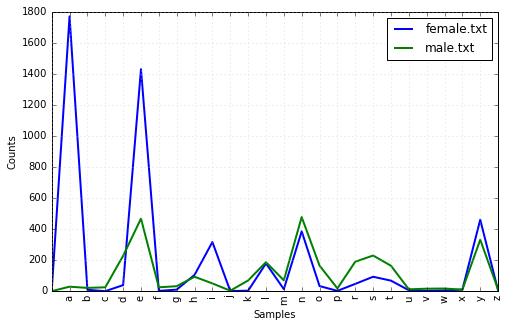

In [258]:
cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid))
cfd.plot()

In [259]:
from nltk.corpus import swadesh

In [260]:
swadesh.fileids()

['be',
 'bg',
 'bs',
 'ca',
 'cs',
 'cu',
 'de',
 'en',
 'es',
 'fr',
 'hr',
 'it',
 'la',
 'mk',
 'nl',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'sr',
 'sw',
 'uk']

In [261]:
swadesh.words('en')

['I',
 'you (singular), thou',
 'he',
 'we',
 'you (plural)',
 'they',
 'this',
 'that',
 'here',
 'there',
 'who',
 'what',
 'where',
 'when',
 'how',
 'not',
 'all',
 'many',
 'some',
 'few',
 'other',
 'one',
 'two',
 'three',
 'four',
 'five',
 'big',
 'long',
 'wide',
 'thick',
 'heavy',
 'small',
 'short',
 'narrow',
 'thin',
 'woman',
 'man (adult male)',
 'man (human being)',
 'child',
 'wife',
 'husband',
 'mother',
 'father',
 'animal',
 'fish',
 'bird',
 'dog',
 'louse',
 'snake',
 'worm',
 'tree',
 'forest',
 'stick',
 'fruit',
 'seed',
 'leaf',
 'root',
 'bark (from tree)',
 'flower',
 'grass',
 'rope',
 'skin',
 'meat',
 'blood',
 'bone',
 'fat (noun)',
 'egg',
 'horn',
 'tail',
 'feather',
 'hair',
 'head',
 'ear',
 'eye',
 'nose',
 'mouth',
 'tooth',
 'tongue',
 'fingernail',
 'foot',
 'leg',
 'knee',
 'hand',
 'wing',
 'belly',
 'guts',
 'neck',
 'back',
 'breast',
 'heart',
 'liver',
 'drink',
 'eat',
 'bite',
 'suck',
 'spit',
 'vomit',
 'blow',
 'breathe',
 'laugh',

In [262]:
inds = [i for i,w in enumerate(swadesh.words('en')) if w in ['man (adult male)',
                                                      'woman',
                                                      'mother',
                                                      'father',
                                                      'husband',
                                                      'wife']]

In [263]:
languages = ['en','fr','de','ru','uk','sk','sl']
print(languages)
print()
for ind in inds:
    print(swadesh.entries(languages)[ind])

['en', 'fr', 'de', 'ru', 'uk', 'sk', 'sl']

('woman', 'femme', 'Frau', 'женщина', 'жінка', 'žena', 'ženska')
('man (adult male)', 'homme', 'Mann', 'мужчина', 'чоловік', 'muž', 'moški')
('wife', 'femme, épouse', 'Frau, Ehefrau', 'супруга', 'жінка', 'žena', 'žena')
('husband', 'mari, époux', 'Mann, Ehemann', 'супруг', 'чоловік', 'manžel', 'mož')
('mother', 'mère', 'Mutter', 'мать', 'мати', 'matka', 'mati')
('father', 'père', 'Vater', 'отец', 'батько', 'otec', 'oče')


In [ ]:
languages = swadesh.fileids()
for language in languages:
    swadesh.entries(languages)['dog']

In [ ]:
from nltk.corpus import toolbox
toolbox.entries('rotokas.dic')

In [264]:
from nltk.corpus import wordnet as wn

In [265]:
wordnet

<WordNetCorpusReader in 'C:\\Users\\Apogentus\\AppData\\Roaming\\nltk_data\\corpora\\wordnet'>

In [269]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [267]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [270]:
wn.synset('car.n.02').lemma_names()

['car', 'railcar', 'railway_car', 'railroad_car']

In [268]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [ ]:
wn.synset('car.n.01').examples()

In [ ]:
wn.synset('car.n.01').lemmas()

In [ ]:
wn.synset('car.n.01').examples()

In [ ]:
wn.lemmas('car')

In [ ]:
wn.lemma('car.n.04.car').synset()

In [ ]:
wn.lemmas('dish')

In [ ]:
wn.synset('dish.n.01').definition()

In [ ]:
wn.synset('dish.n.02').definition()

In [ ]:
wn.synset('dish.n.04').definition()

In [ ]:
wn.synset('dish.n.04').lemmas()

In [ ]:
wn.synset('dish.n.05').definition()

In [ ]:
wn.synset('dish.n.05').lemmas()

In [ ]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()

In [ ]:
wn.lemmas('dish')

In [ ]:
wn.synsets('dish')

In [ ]:
wn.synset('dish.n.01').definition()

In [ ]:
wn.synset('dish.n.01').examples()

In [ ]:
wn.lemma('dish.n.01.dish').name()

In [ ]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[0]

In [ ]:
sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())

In [ ]:
motorcar.hypernyms()

In [ ]:
paths = motorcar.hypernym_paths()
len(paths)

In [ ]:
[synset.name() for synset in paths[0]]

In [ ]:
[synset.name() for synset in paths[1]]

In [ ]:
wn.synset('eat.v.01').entailments()

In [ ]:
word = 'house'
wn.synsets('building')
#synset.part_meronyms(), synset.substance_meronyms()

In [ ]:
wn.synset('building.n.01').part_meronyms()

In [ ]:
wn.synsets('water')

In [ ]:
wn.synset('water.n.01').substance_meronyms()

In [ ]:
wn.synset('eat.v.01').entailments()

In [ ]:
wn.lemma('supply.n.02.supply').antonyms()